# Temoa Simulation Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from data_parser import get_output_files, make_capacity_plots
from data_parser import get_scenario_name, parse_datalines, create_dataframe, create_column
from data_parser import data_by_tech, data_by_variable, data_by_year
from data_parser import variables, time_horizon, get_total

Step 1: Get the list of output files

In [2]:
file_list = get_output_files()
file_list

['./data_files/BAU_IL_bau_model/bau_OutputLog.log']

Step 2: Get the scenario name and the data from the file

In [3]:
scenario_name = get_scenario_name(file_list[0])
scenario_name

'bau'

In [4]:
datalines = parse_datalines(file_list[0])
datalines

['\n',
 'Solver will write file: bau.lp\n',
 '\n',
 'Reading data files.[    0.01]\n',
 'Creating Temoa model instance.[    0.10]\n',
 'Solving.[    0.13]\n',
 'Calculating reporting variables and formatting results.[    0.25]\n',
 'Model name: Temoa\n',
 'Objective function value (TotalCost): 0.0\n',
 'Non-zero variable values:\n',
 "       '0.000000'  Objective[('TotalCost')]\n",
 "   '14483.405000'  V_Capacity[IL,COAL_PLANT_EXISTING,2030]\n",
 "   '24146.250000'  V_Capacity[IL,COAL_PLANT_EXISTING,2035]\n",
 "    '9661.398800'  V_Capacity[IL,COAL_PLANT_NEW,2030]\n",
 "    '9661.398800'  V_Capacity[IL,NATGAS_PLANT_EXISTING,2030]\n",
 "   '14483.405000'  V_Capacity[IL,NATGAS_PLANT_EXISTING,2040]\n",
 "    '9661.398800'  V_Capacity[IL,NATGAS_PLANT_EXISTING,2045]\n",
 "   '24146.250000'  V_Capacity[IL,NATGAS_PLANT_NEW,2030]\n",
 "   '24146.250000'  V_Capacity[IL,NATGAS_PLANT_NEW,2035]\n",
 "    '9661.398800'  V_Capacity[IL,NATGAS_PLANT_NEW,2040]\n",
 "    '9661.398800'  V_Capacity[IL,NUC

In [5]:
variable = variables['capacity']
capacity_data = data_by_variable(datalines, variable)
capacity_data

["  '211521.150000'  V_CapacityAvailableByPeriodAndTech[IL,2025,TRANSMISSION]\n",
 "   '24146.250000'  V_CapacityAvailableByPeriodAndTech[IL,2025,WIND_FARM]\n",
 "   '14483.405000'  V_CapacityAvailableByPeriodAndTech[IL,2030,COAL_PLANT_EXISTING]\n",
 "    '9661.398800'  V_CapacityAvailableByPeriodAndTech[IL,2030,COAL_PLANT_NEW]\n",
 "    '9661.398800'  V_CapacityAvailableByPeriodAndTech[IL,2030,NATGAS_PLANT_EXISTING]\n",
 "   '24146.250000'  V_CapacityAvailableByPeriodAndTech[IL,2030,NATGAS_PLANT_NEW]\n",
 "    '9661.398800'  V_CapacityAvailableByPeriodAndTech[IL,2030,NUCLEAR_EXISTING]\n",
 "   '14483.405000'  V_CapacityAvailableByPeriodAndTech[IL,2030,SOLAR_FARM]\n",
 "   '14483.405000'  V_CapacityAvailableByPeriodAndTech[IL,2030,SOLAR_RESIDENTIAL]\n",
 "  '423042.300000'  V_CapacityAvailableByPeriodAndTech[IL,2030,TRANSMISSION]\n",
 "   '38629.655000'  V_CapacityAvailableByPeriodAndTech[IL,2030,WIND_FARM]\n",
 "   '38629.655000'  V_CapacityAvailableByPeriodAndTech[IL,2035,COAL_PLANT_

In [6]:
for year in time_horizon:
    yearly_data = data_by_year(capacity_data, year)
    print(get_total(yearly_data))

235667.4
558252.6163999999
866358.7766
1126163.7378
1145480.7398
1121334.4898


In [7]:
capacity2025 = data_by_year(capacity_data, 2025)
total = 0.0
for line in capacity2025:
    data_sep = line.split()
    print(data_sep[0])
    str_value = data_sep[0].strip('\'')
    print(str_value)
#     total += float(data_sep[0])

'211521.150000'
211521.150000
'24146.250000'
24146.250000


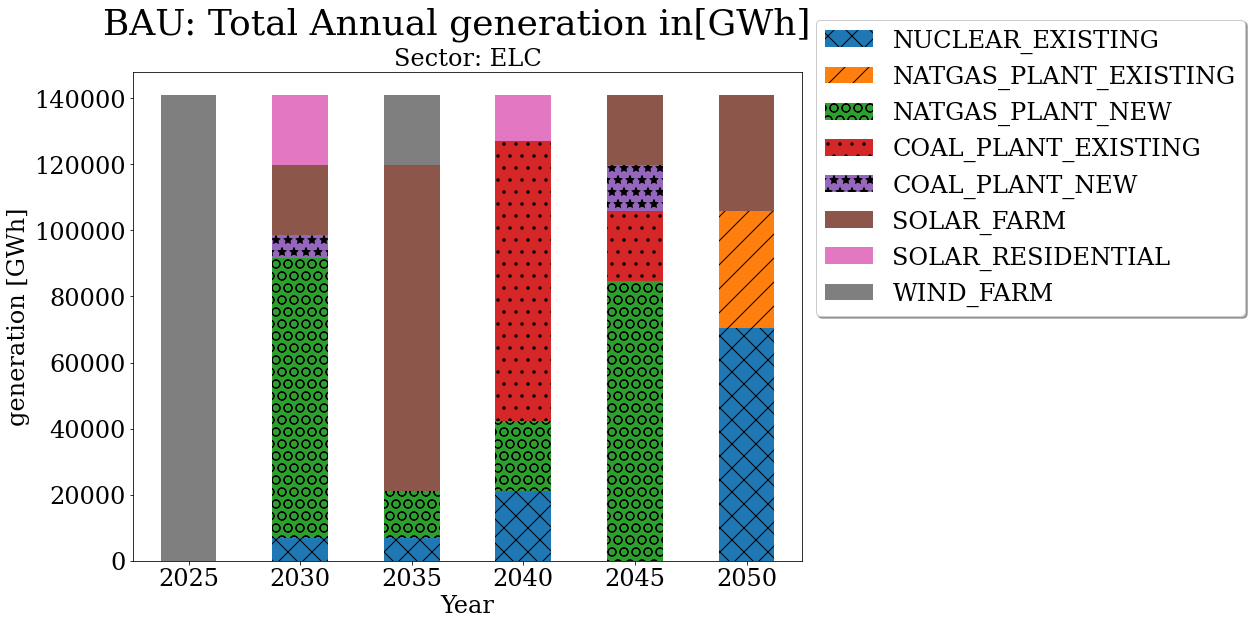

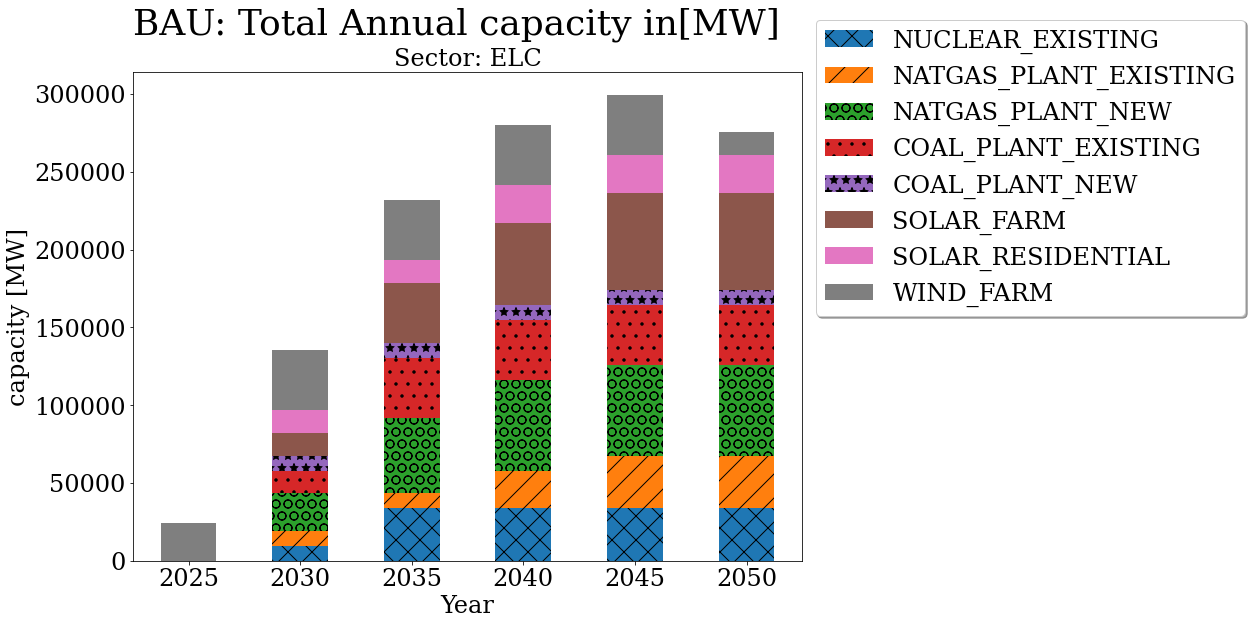

In [8]:
for file in file_list:
    make_capacity_plots(file_list, to_save=False)